In [1]:
import pandas as pd
from datasets import load_dataset


def load_and_sample_data():
    # Load the dataset
    dataset = load_dataset("amazon_polarity")

    # Convert to DataFrame for easier manipulation
    df = pd.DataFrame(dataset['train'])

    # Sample 6000 records from the dataset
    df_sampled = df.head(6000)

    return df_sampled

In [2]:
df_sampled = load_and_sample_data()

In [3]:
df_sampled.head()

,label,title,content
0,1,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,1,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,1,Amazing!,This soundtrack is my favorite music of all ti...
3,1,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
4,1,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."


In [4]:
df_sampled = df_sampled.reset_index()

df_sampled = df_sampled.rename(columns={'index': 'id'})

In [5]:
df_sampled.head()

,id,label,title,content
0,0,1,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,1,1,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,2,1,Amazing!,This soundtrack is my favorite music of all ti...
3,3,1,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
4,4,1,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."


In [6]:
df_sampled.shape

(6000, 4)

# Visualization of the label counts

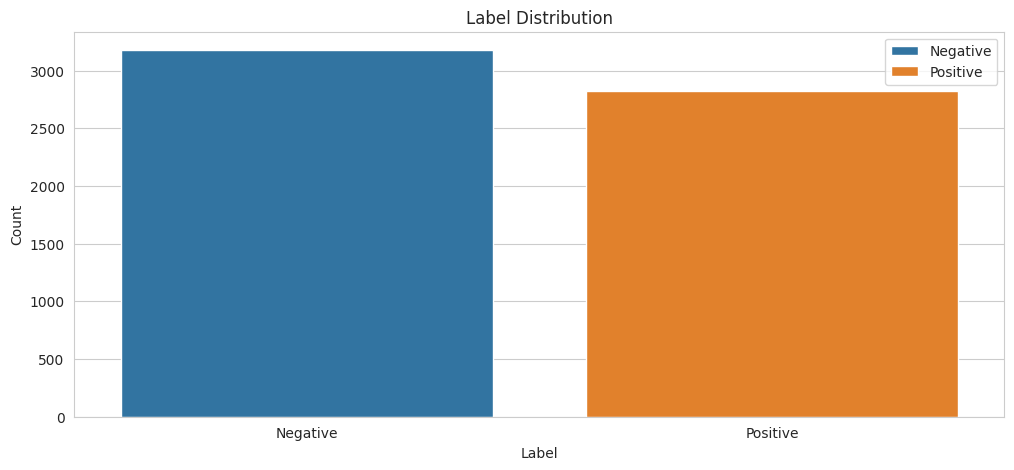

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
sns.countplot(x='label', data=df_sampled, hue='label')
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.legend(['Negative', 'Positive'], loc='upper right')
plt.show()

In [8]:
example = df_sampled['content'][50]
print(example)

I bought this to replace a 13" tube tv in my kitchen. What I gained was a larger screen plus relcaiming the counter space. The picture is good, and the internal DVD player is a bonus. All in all, a good purchase.


In [9]:
import nltk
nltk.download('punkt_tab')

tokens = nltk.word_tokenize(example)

[nltk_data] Downloading package punkt_tab to /home/arian/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [10]:
tokens[:10]

['I', 'bought', 'this', 'to', 'replace', 'a', '13', "''", 'tube', 'tv']

In [11]:
nltk.download('averaged_perceptron_tagger_eng')

tagged = nltk.pos_tag(tokens)
tagged[:10]

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /home/arian/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


[('I', 'PRP'),
 ('bought', 'VBD'),
 ('this', 'DT'),
 ('to', 'TO'),
 ('replace', 'VB'),
 ('a', 'DT'),
 ('13', 'CD'),
 ("''", "''"),
 ('tube', 'NN'),
 ('tv', 'NN')]

In [12]:
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')

entities = nltk.chunk.ne_chunk(tagged)
print(entities)

(S
  I/PRP
  bought/VBD
  this/DT
  to/TO
  replace/VB
  a/DT
  13/CD
  ''/''
  tube/NN
  tv/NN
  in/IN
  my/PRP$
  kitchen/NN
  ./.
  What/WP
  I/PRP
  gained/VBD
  was/VBD
  a/DT
  larger/JJR
  screen/JJ
  plus/CC
  relcaiming/VBG
  the/DT
  counter/NN
  space/NN
  ./.
  The/DT
  picture/NN
  is/VBZ
  good/JJ
  ,/,
  and/CC
  the/DT
  internal/JJ
  (ORGANIZATION DVD/NNP)
  player/NN
  is/VBZ
  a/DT
  bonus/NN
  ./.
  All/DT
  in/IN
  all/DT
  ,/,
  a/DT
  good/JJ
  purchase/NN
  ./.)


[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /home/arian/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package words to /home/arian/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [13]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

nltk.download('vader_lexicon')


sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/arian/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [14]:
sia.polarity_scores("Im so happy!")

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [15]:
sia.polarity_scores("This is the worst thing ever!")

{'neg': 0.468, 'neu': 0.532, 'pos': 0.0, 'compound': -0.6588}

In [16]:
sia.polarity_scores("I am neutral about this.")

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [17]:
results = {}

for i, row in tqdm(df_sampled.iterrows(), total=len(df_sampled)):
    text = row['content']
    myid = row['id']
    results[myid] = sia.polarity_scores(text)

  0%|          | 0/6000 [00:00<?, ?it/s]

In [18]:
results

{0: {'neg': 0.093, 'neu': 0.651, 'pos': 0.256, 'compound': 0.9454},
 1: {'neg': 0.019, 'neu': 0.851, 'pos': 0.129, 'compound': 0.8481},
 2: {'neg': 0.04, 'neu': 0.691, 'pos': 0.269, 'compound': 0.9854},
 3: {'neg': 0.092, 'neu': 0.628, 'pos': 0.28, 'compound': 0.9753},
 4: {'neg': 0.0, 'neu': 0.719, 'pos': 0.281, 'compound': 0.9781},
 5: {'neg': 0.015, 'neu': 0.752, 'pos': 0.233, 'compound': 0.9873},
 6: {'neg': 0.126, 'neu': 0.803, 'pos': 0.07, 'compound': -0.8744},
 7: {'neg': 0.074, 'neu': 0.591, 'pos': 0.335, 'compound': 0.9887},
 8: {'neg': 0.116, 'neu': 0.705, 'pos': 0.179, 'compound': 0.8353},
 9: {'neg': 0.0, 'neu': 0.79, 'pos': 0.21, 'compound': 0.867},
 10: {'neg': 0.373, 'neu': 0.571, 'pos': 0.056, 'compound': -0.9233},
 11: {'neg': 0.0, 'neu': 0.868, 'pos': 0.132, 'compound': 0.9217},
 12: {'neg': 0.046, 'neu': 0.567, 'pos': 0.388, 'compound': 0.9827},
 13: {'neg': 0.079, 'neu': 0.733, 'pos': 0.188, 'compound': 0.8965},
 14: {'neg': 0.153, 'neu': 0.769, 'pos': 0.077, 'compo

VADER (Valence Aware Dictionary and sEntiment Reasoner) - Bag of words approach

In [19]:
vaders = pd.DataFrame(results).T
vaders.head()

,neg,neu,pos,compound
0,0.093,0.651,0.256,0.9454
1,0.019,0.851,0.129,0.8481
2,0.040,0.691,0.269,0.9854
3,0.092,0.628,0.280,0.9753
4,0.000,0.719,0.281,0.9781


In [20]:
vaders = vaders.reset_index()
vaders = vaders.rename(columns={'index': 'id'})
vaders = vaders.merge(df_sampled, how="left", on="id")

In [21]:
vaders.head()

,id,neg,neu,pos,compound,label,title,content
0,0,0.093,0.651,0.256,0.9454,1,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,1,0.019,0.851,0.129,0.8481,1,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,2,0.040,0.691,0.269,0.9854,1,Amazing!,This soundtrack is my favorite music of all ti...
3,3,0.092,0.628,0.280,0.9753,1,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
4,4,0.000,0.719,0.281,0.9781,1,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."


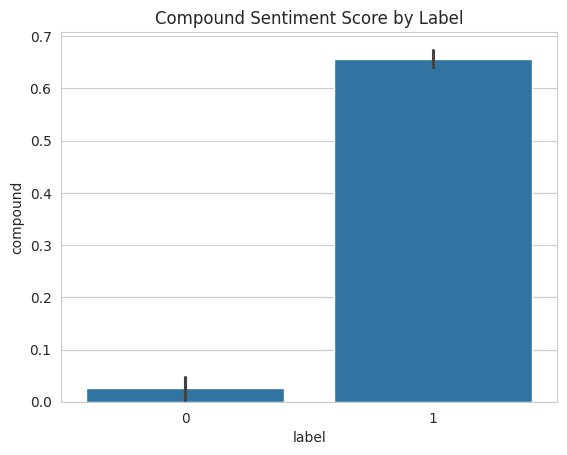

In [22]:
ax = sns.barplot(data=vaders, x='label', y='compound')
ax.set_title('Compound Sentiment Score by Label')
plt.show()

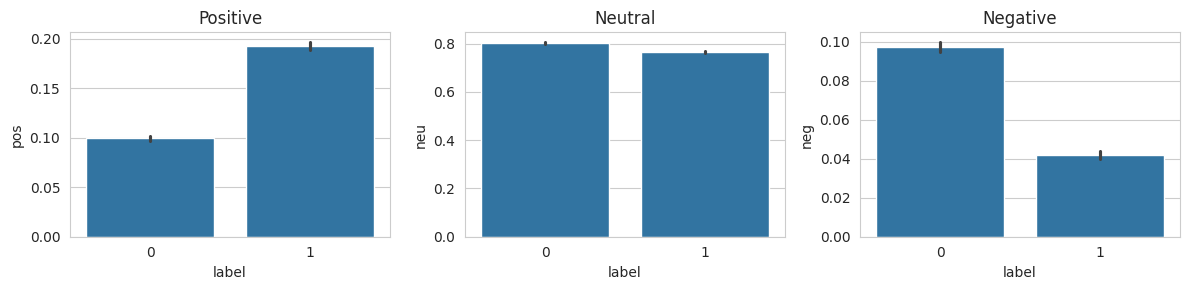

In [23]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='label', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='label', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='label', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# roBERTa pretrained model

In [24]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

In [25]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [26]:
print(example)

I bought this to replace a 13" tube tv in my kitchen. What I gained was a larger screen plus relcaiming the counter space. The picture is good, and the internal DVD player is a bonus. All in all, a good purchase.


In [27]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.729, 'pos': 0.271, 'compound': 0.8979}

In [28]:
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)

scores_dict = {
    'roberta_negative': scores[0],
    'roberta_neutral': scores[1],
    'roberta_positive': scores[2]
}

print(scores_dict)

{'roberta_negative': np.float32(0.0022050568), 'roberta_neutral': np.float32(0.02934242), 'roberta_positive': np.float32(0.9684525)}


In [29]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)

    scores_dict = {
        'roberta_negative': scores[0],
        'roberta_neutral': scores[1],
        'roberta_positive': scores[2]
    }

    return scores_dict

In [30]:
res = {}

for i, row in tqdm(df_sampled.iterrows(), total=len(df_sampled)):
    try:
        text = row['content']
        myid = row['id']
        
        vaders_result = sia.polarity_scores(text)
        vader_result_name = {}
        
        for key, value in vaders_result.items():
            vader_result_name[f'vader_{key}'] = value
        
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_name, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f"Broke for id: {myid}")

  0%|          | 0/6000 [00:00<?, ?it/s]

In [31]:
results = pd.DataFrame(res).T
results

,vader_neg,vader_neu,vader_pos,vader_compound,roberta_negative,roberta_neutral,roberta_positive
0,0.093,0.651,0.256,0.9454,0.002601,0.012606,0.984793
1,0.019,0.851,0.129,0.8481,0.020066,0.115552,0.864382
2,0.040,0.691,0.269,0.9854,0.004148,0.023839,0.972013
3,0.092,0.628,0.280,0.9753,0.001326,0.024329,0.974345
4,0.000,0.719,0.281,0.9781,0.001677,0.013979,0.984344
...,...,...,...,...,...,...,...
5995,0.000,0.834,0.166,0.8608,0.008959,0.060611,0.930430
5996,0.000,0.721,0.279,0.8422,0.001742,0.017109,0.981149
5997,0.057,0.720,0.223,0.9569,0.009984,0.054112,0.935904
5998,0.106,0.797,0.097,-0.1027,0.003774,0.112259,0.883967


In [32]:
results = results.reset_index().rename(columns={'index': 'id'})
results = results.merge(df_sampled, how="left", on="id")

In [33]:
results.head()

,id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_negative,roberta_neutral,roberta_positive,label,title,content
0,0,0.093,0.651,0.256,0.9454,0.002601,0.012606,0.984793,1,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,1,0.019,0.851,0.129,0.8481,0.020066,0.115552,0.864382,1,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,2,0.040,0.691,0.269,0.9854,0.004148,0.023839,0.972013,1,Amazing!,This soundtrack is my favorite music of all ti...
3,3,0.092,0.628,0.280,0.9753,0.001326,0.024329,0.974345,1,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
4,4,0.000,0.719,0.281,0.9781,0.001677,0.013979,0.984344,1,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."


In [34]:
results_df = results

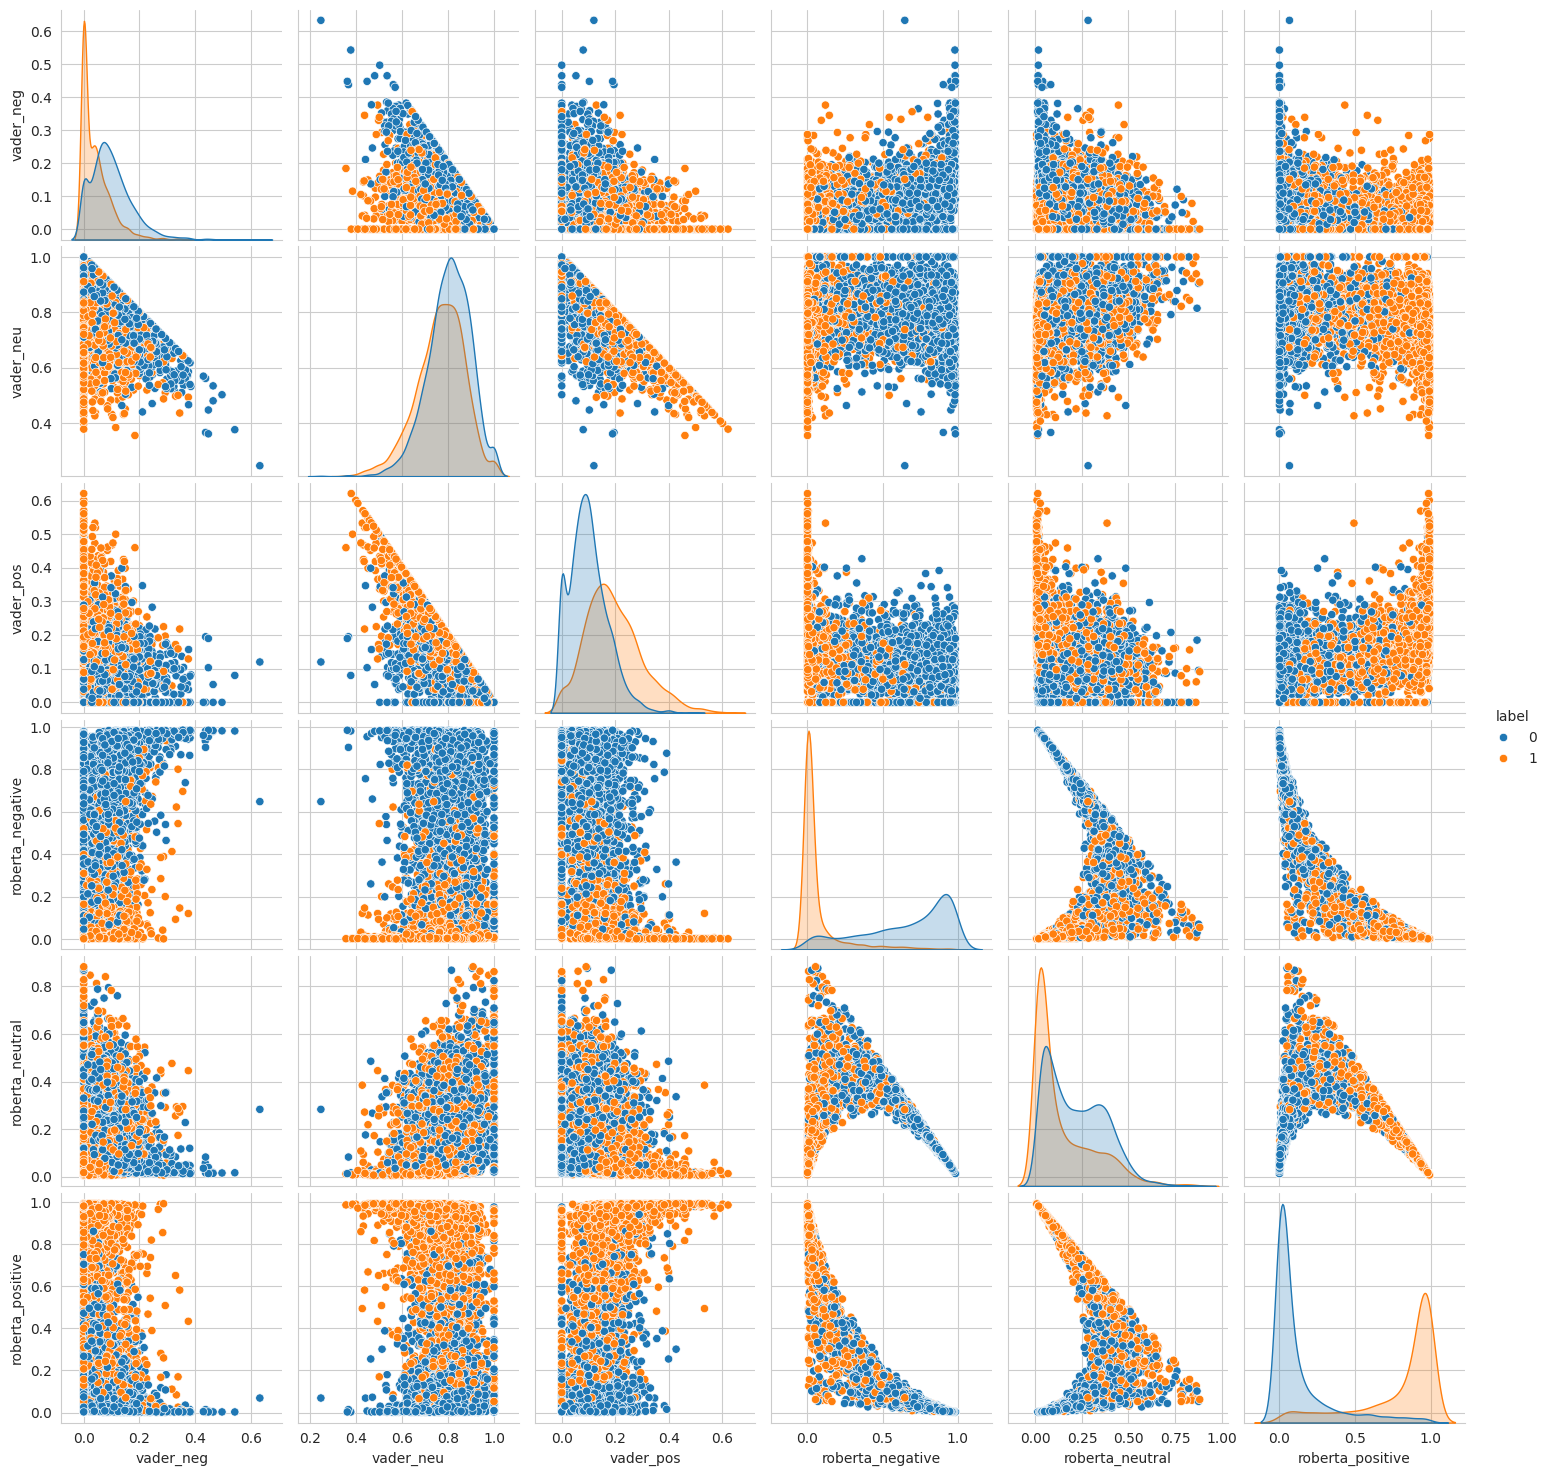

In [35]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos', 
                   'roberta_negative', 'roberta_neutral', 'roberta_positive'],
             hue='label',
             palette='tab10')

plt.show()